<a href="https://colab.research.google.com/github/bobolinkk/projects/blob/main/TEST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 4
subscriber_id – id абонента
birthday – дата рождения абонента

gender – пол

handset_vendor – марка используемого телефонного аппарата

region – область регистрации абонента

price_plan – наименование тарифного плана

price_plan_monthly_fee – абонентская плата

ARPU – средний счет абонента за месяц

Используя Python: 
1. Приведите описательную статистику по абонентской плате и среднему счету, представленные в таблице. 
2. Добавьте поле с указанием возраста абонента (полных лет, целое число)
3. Добавьте поле с флагом для тех абонентов, у кого счет за месяц более чем на 15% превышает размер абонентской платы (1 - превышает более чем на 15%, 0 – не превышает). 
4. Визуализируйте и проанализируйте распределение абонентов по: 
- возрасту и счету
- областям и полу (в разрезе пола)
- по счету, тарифу и марке телефона с отражением степени разброса данных по счету
наиболее подходящим на Ваш взгляд типом диаграммы. 
5. Какие еще диаграммы распределения имеет смысл (будет интересно) проанализировать по предоставленным данным? Приведите эти диаграммы.

###IMPORT

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [4]:
df = pd.read_csv('/content/task_4.csv')

In [99]:
df

,subscriber_id,birthday,gender,handset_vendor,region,price_plan,price_plan_monthly_fee,ARPU
0,1,1975-04-19,MALE,Huawei,Brestskaya,Plan1,20.712,43.0752
1,2,1974-02-03,MALE,Samsung,Minsk,Plan1,20.712,20.7120
2,3,1968-03-09,FEMALE,Huawei,Gomelskaya,Plan1,20.712,20.7120
3,4,2001-02-12,MALE,Xiaomi,Mogilevskaya,Plan3,12.312,17.5440
4,5,1983-01-16,MALE,Samsung,Minsk,Plan3,12.312,12.3120
...,...,...,...,...,...,...,...,...
995,996,1996-03-05,MALE,Apple,Minsk,Plan3,12.312,24.0432
996,997,2000-03-03,FEMALE,Apple,Minskaya,Plan3,12.312,17.5440
997,998,1997-01-03,MALE,Apple,Minsk,Plan2,14.808,28.7680
998,999,1997-01-10,FEMALE,Apple,Grodnenskaya,Plan3,12.312,18.4076


## Point 1. Приведите описательную статистику по абонентской плате и среднему счету, представленные в таблице.


In [153]:
df[['ARPU', 'price_plan_monthly_fee']].describe()

,ARPU,price_plan_monthly_fee
count,1000.000000,1000.000000
mean,22.582844,16.721760
std,8.241737,3.917098
min,11.352000,11.232000
25%,16.062400,12.312000
50%,20.899200,14.808000
75%,26.668400,20.712000
max,49.519500,20.712000


## Point 2. Добавьте поле с указанием возраста абонента (полных лет, целое число)

In [5]:
from datetime import date

In [6]:
df['birthday'] = pd.to_datetime(df['birthday'])

In [7]:
df['age'] = date.today().year - df['birthday'].dt.year
df.loc[df['birthday'].dt.month > date.today().month, 'age'] += -1 # уменьшаем возраст, если месяц рождения еще не наступил в этом году
df.loc[(df['birthday'].dt.month == date.today().month) & (df['birthday'].dt.day > date.today().day), 'age'] += -1 # аналогично, только с днем

In [8]:
len(df[(df['birthday'].dt.month >= date.today().month)]) # можно было не отнимать возраст, потому что в выборке все родились до августа, но если будем еще раз использовать код в следующем году, или с другой выборкой, то пригодится

0

In [9]:
df[['birthday', 'age']].head(10)

,birthday,age
0,1975-04-19,47
1,1974-02-03,48
2,1968-03-09,54
3,2001-02-12,21
4,1983-01-16,39
5,1990-06-04,32
6,1982-06-06,40
7,1978-01-06,44
8,1996-01-01,26
9,1973-03-10,49


## Point 3 Добавьте поле с флагом для тех абонентов, у кого счет за месяц более чем на 15% превышает размер абонентской платы (1 - превышает более чем на 15%, 0 – не превышает).

In [10]:
df['is_ARPU_bigger'] = df['ARPU'] > df['price_plan_monthly_fee'] * 1.15

In [11]:
df[['ARPU', 'price_plan_monthly_fee', 'is_ARPU_bigger']].head(10)

,ARPU,price_plan_monthly_fee,is_ARPU_bigger
0,43.0752,20.712,True
1,20.7120,20.712,False
2,20.7120,20.712,False
3,17.5440,12.312,True
4,12.3120,12.312,False
5,30.7296,20.712,True
6,20.7600,20.712,False
7,18.0720,12.312,True
8,23.9620,20.712,True
9,12.3120,12.312,False


## Point 4 Визуализируйте и проанализируйте распределение абонентов

In [12]:
df.columns

Index(['subscriber_id', 'birthday', 'gender', 'handset_vendor', 'region',
       'price_plan', 'price_plan_monthly_fee', 'ARPU', 'age',
       'is_ARPU_bigger'],
      dtype='object')

###по возрасту и счету

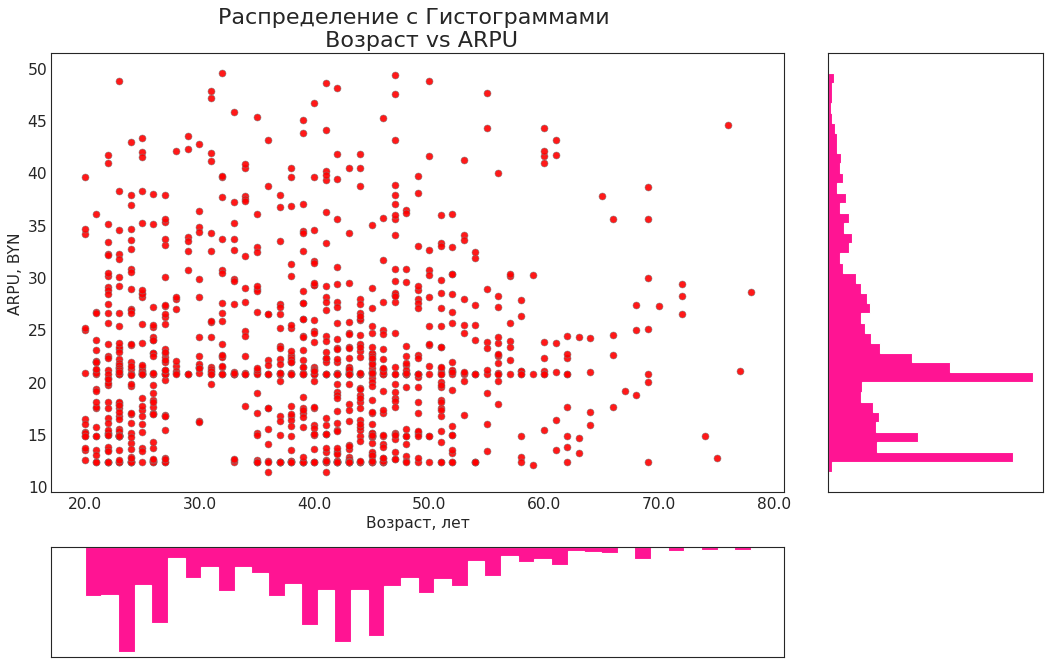

In [13]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('age', 'ARPU', s=40, c='Red', alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.age, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(df.ARPU, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Распределение с Гистограммами \n Возраст vs ARPU', xlabel='Возраст, лет', ylabel='ARPU, BYN')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

Вывод: 

* На обоих осях можно наблюдать бимодальное распределение. 

* ARPU сконцентрировано в области около 13 и около 21 BYN. Предпологаю, что это обусловлено стоимостью двух самых популярных тарифных планов(в дальнейшем, можно в этом убедиться).
 
* **Есть пробел в диапазоне около 30 лет и 10-20 BYN. Принимая во внимание тот факт, что в выборке все абоненты родились до августа, то можно говорить о плохой репрезентативности выборки***

### областям и полу (в разрезе пола)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


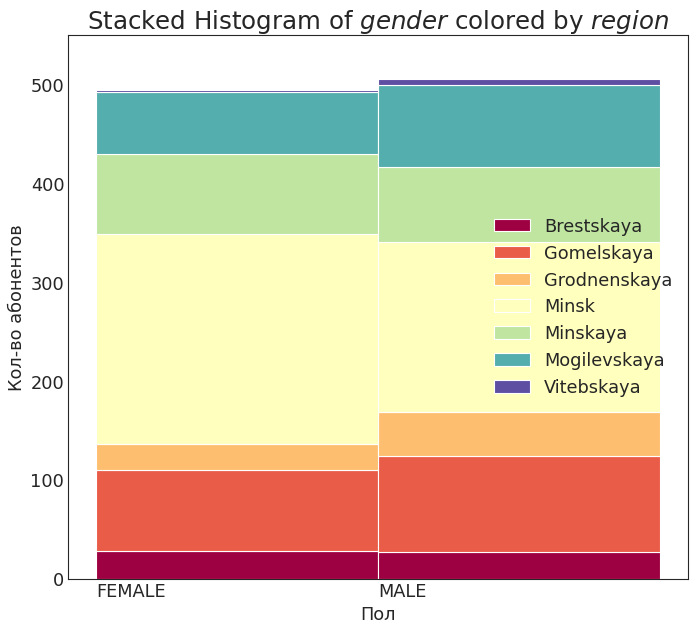

In [14]:
# Prepare data
x_var = 'gender'
groupby_var = 'region'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(10,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, df[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel('Пол')
plt.ylabel("Кол-во абонентов")
plt.ylim(0, 550)
plt.xticks(ticks=bins, labels=np.unique(df[x_var]).tolist(), rotation=0, horizontalalignment='left')
plt.show()

Вывод: 
* абонентов женского пола значительно больше в Минске

* абонентов мужского пола больше в Гомельской, Гродненской и Могилевской 

* Распределение абонентов по областям не соответствует распределению населения. Это сильно заметно по Витебской и Брестской областям

### по счету, тарифу и марке телефона с отражением степени разброса данных по счету наиболее подходящим на Ваш взгляд типом диаграммы.

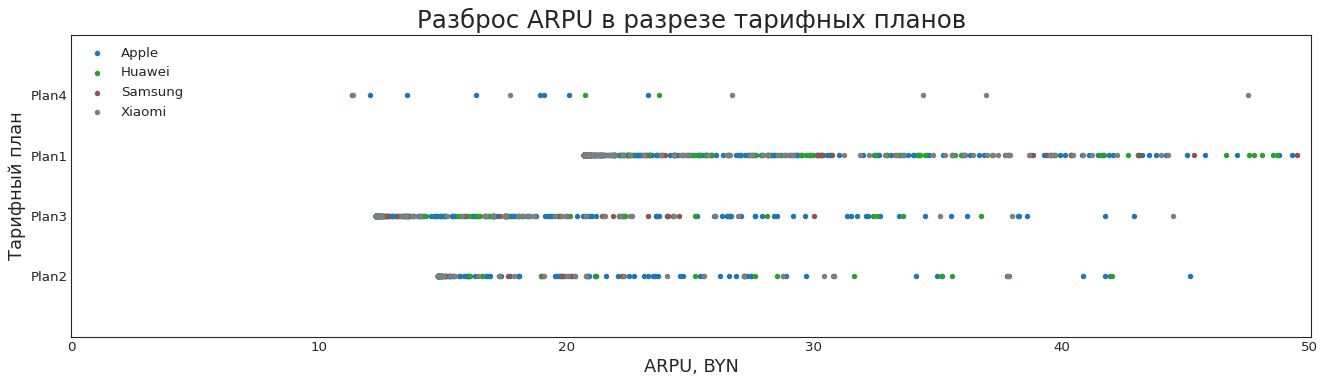

In [16]:
categories = np.unique(df['handset_vendor'])
colors = [plt.cm.tab10(i/float(4)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(20, 5), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('ARPU', 'price_plan', 
                data=df.loc[df.handset_vendor==category, :], 
                s=15, c=colors[i], label=str(category))
# Decorations
plt.gca().set(xlim=(0.0, 50.1), ylim=(-1, 4),
              xlabel='ARPU, BYN', ylabel='Тарифный план')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Разброс ARPU в разрезе тарифных планов", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

Вывод: 
* можно подвердить гипотезу о популяронсти ТП_3 и ТП_1
* меньше всего пользуются смартфонами Самсунг
* владельцы Xiaomi имеют более низкий счет и не сильно выходят за абонентскую плату
* наиболее высокий ARPU у владельцев Apple и Huawei на ТП_1 

## Point 5 Какие еще диаграммы распределения имеет смысл (будет интересно) проанализировать по предоставленным данным? Приведите эти диаграммы.

### Диаграмма корреляции

In [26]:
df.columns[1:]

Index(['birthday', 'gender', 'handset_vendor', 'region', 'price_plan',
       'price_plan_monthly_fee', 'ARPU', 'age', 'is_ARPU_bigger'],
      dtype='object')

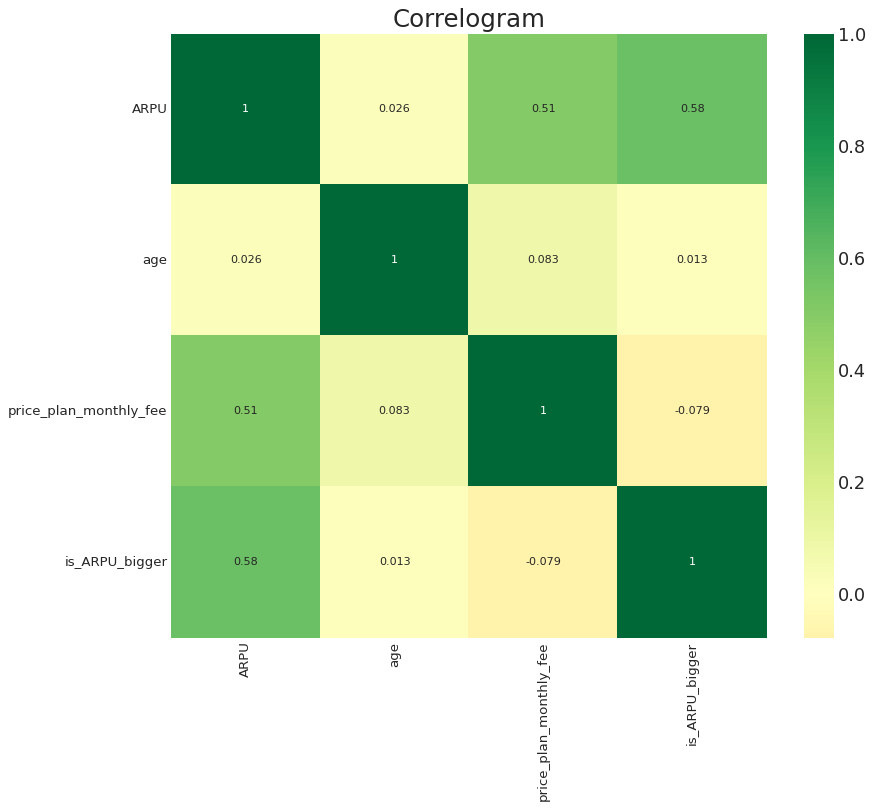

In [32]:
metrics = df[['ARPU', 'age', 'price_plan_monthly_fee', 'is_ARPU_bigger']]
# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(metrics.corr(), xticklabels=metrics.columns, yticklabels=metrics.columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Вывод: из всех числовых метрик в df, пар с высокой связью нет. 